# Comunitati in retele complexe

Pentru o retea data si o impartire a nodurilor pe comunitati, sa se determine calitatea acestor comunitati folosind metrica de modularitate (https://www.cs.cmu.edu/~ckingsf/bioinfo-lectures/modularity.pdf). 



In [1]:
# read the network details
def readNet(fileName):
    f = open(fileName, "r")
    net = {}
    n = int(f.readline())
    net['noNodes'] = n
    mat = []
    for i in range(n):
        mat.append([])
        line = f.readline()
        elems = line.split(" ")
        for j in range(n):
            mat[-1].append(int(elems[j]))
    net["mat"] = mat 
    degrees = []
    noEdges = 0
    for i in range(n):
        d = 0
        for j in range(n):
            if (mat[i][j] == 1):
                d += 1
            if (j > i):
                noEdges += mat[i][j]
        degrees.append(d)
    net["noEdges"] = noEdges
    net["degrees"] = degrees
    f.close()
    return net


In [4]:
# load a tetwork
import os 

crtDir =  os.getcwd()
filePath = os.path.join(crtDir, 'lab03_fcOptimisGA', 'communityDetection', 'data', 'net.in')
network = readNet(filePath)



C:\Users\laura\AppData\Roaming\Python\Python37\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


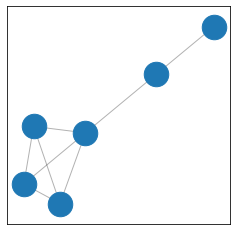

In [5]:
# plot the network 
import numpy as np 
import networkx as nx
import matplotlib.pyplot as plt 

A=np.matrix(network["mat"])
G=nx.from_numpy_matrix(A)
pos = nx.spring_layout(G)  # compute graph layout
plt.figure(figsize=(4, 4))  # image is 8 x 8 inches 
nx.draw_networkx_nodes(G, pos, node_size=600, cmap=plt.cm.RdYlBu)
nx.draw_networkx_edges(G, pos, alpha=0.3)
plt.show(G)


C:\Users\laura\AppData\Roaming\Python\Python37\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


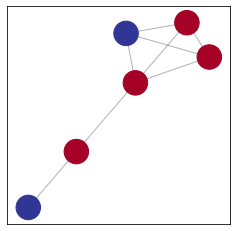

In [7]:
# plot a particular division in communities
communities = [1,2,1,2,1, 1]

A=np.matrix(network["mat"])
G=nx.from_numpy_matrix(A)
pos = nx.spring_layout(G)  # compute graph layout
plt.figure(figsize=(4, 4))  # image is 8 x 8 inches 
nx.draw_networkx_nodes(G, pos, node_size = 600, cmap = plt.cm.RdYlBu, node_color = communities)
nx.draw_networkx_edges(G, pos, alpha = 0.3)
plt.show(G)


In [9]:
# evaluate the quality of previous communities inside a network
# https://www.cs.cmu.edu/~ckingsf/bioinfo-lectures/modularity.pdf

def modularity(communities, param):
    noNodes = param['noNodes']
    mat = param['mat']
    degrees = param['degrees']
    noEdges = param['noEdges']  
    M = 2 * noEdges
    Q = 0.0
    for i in range(0, noNodes):
        for j in range(0, noNodes):
            if (communities[i] == communities[j]):
               Q += (mat[i][j] - degrees[i] * degrees[j] / M)
    return Q * 1 / M

print(modularity([1,2,1,2,1,1], network))

-0.125


# Homework

Add GA code for identifing the communities by using modularity as fitness function
